In [197]:
# common 
import os
import numpy as np
import pandas as pd

# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# fine tuning
from sklearn.model_selection import GridSearchCV


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import os


# warnings
import warnings
warnings.filterwarnings('ignore')

In [198]:
df = pd.read_csv(R'C:\Users\sogut\Desktop\ML\salarynew.csv')
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN


In [199]:
df.columns

Index(['Name', 'Job Titles', 'Department', 'Full or Part-Time',
       'Salary or Hourly', 'Typical Hours', 'Annual Salary', 'Hourly Rate'],
      dtype='object')

In [200]:
df.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary        float64
Hourly Rate          float64
dtype: object

In [201]:
#need find the when salary or hourly is hourly, then multiply hourly rate with typical hours and 52 weeks
def calculate_annual_salary(row):
    if row['Salary or Hourly'] == 'Hourly':
        return row['Typical Hours'] * row['Hourly Rate'] * 52
    else:
        return row['Annual Salary']

df['Annual Salary'] = df.apply(calculate_annual_salary, axis=1)
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,95472.0,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN


In [202]:
#rename full or part time column
df.rename(columns={'Full or Part-Time': 'Full_Part'}, inplace=True)
df.head()

,Name,Job Titles,Department,Full_Part,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,95472.0,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN


In [203]:
df.Full_Part.value_counts()

Full_Part
F    30018
P     1083
Name: count, dtype: int64

In [204]:
df.drop(['Name'],axis=1, inplace=True)
df.head()

,Job Titles,Department,Full_Part,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,95472.0,45.9
4,POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN


In [205]:
df.isna().sum()

Job Titles              0
Department              0
Full_Part               0
Salary or Hourly        0
Typical Hours       24287
Annual Salary           0
Hourly Rate         24287
dtype: int64

In [206]:
def replace_nan_with_zero(row):
    if pd.isna(row['Typical Hours']):
        return 0
    else:
        return row['Typical Hours']

df['Typical Hours'] = df.apply(replace_nan_with_zero, axis=1)
df.head()

,Job Titles,Department,Full_Part,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,SERGEANT,POLICE,F,Salary,0.0,122568.0,NaN
1,POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,0.0,110796.0,NaN
2,CIVIL ENGINEER IV,WATER MGMNT,F,Salary,0.0,122112.0,NaN
3,CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,95472.0,45.9
4,POLICE OFFICER,POLICE,F,Salary,0.0,86730.0,NaN


In [207]:
def replace_nan_with_zero(row):
    if pd.isna(row['Hourly Rate']):
        return 0
    else:
        return row['Hourly Rate']

df['Hourly Rate'] = df.apply(replace_nan_with_zero, axis=1)
df.head()

,Job Titles,Department,Full_Part,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,SERGEANT,POLICE,F,Salary,0.0,122568.0,0.0
1,POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,0.0,110796.0,0.0
2,CIVIL ENGINEER IV,WATER MGMNT,F,Salary,0.0,122112.0,0.0
3,CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,95472.0,45.9
4,POLICE OFFICER,POLICE,F,Salary,0.0,86730.0,0.0


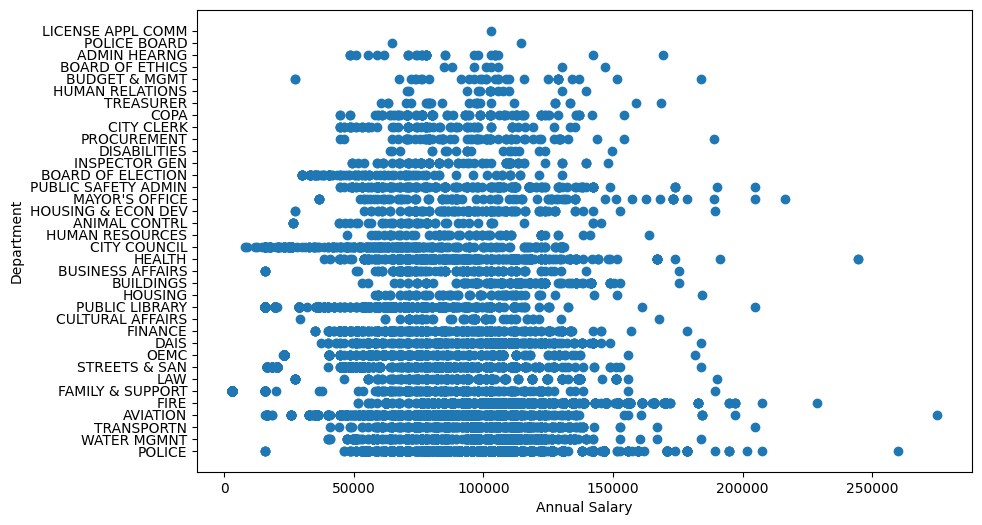

In [208]:
#create scatter plot for annual salary and salary or hourly
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Salary'], df['Department'])
plt.xlabel('Annual Salary')
plt.ylabel('Department')
plt.show()


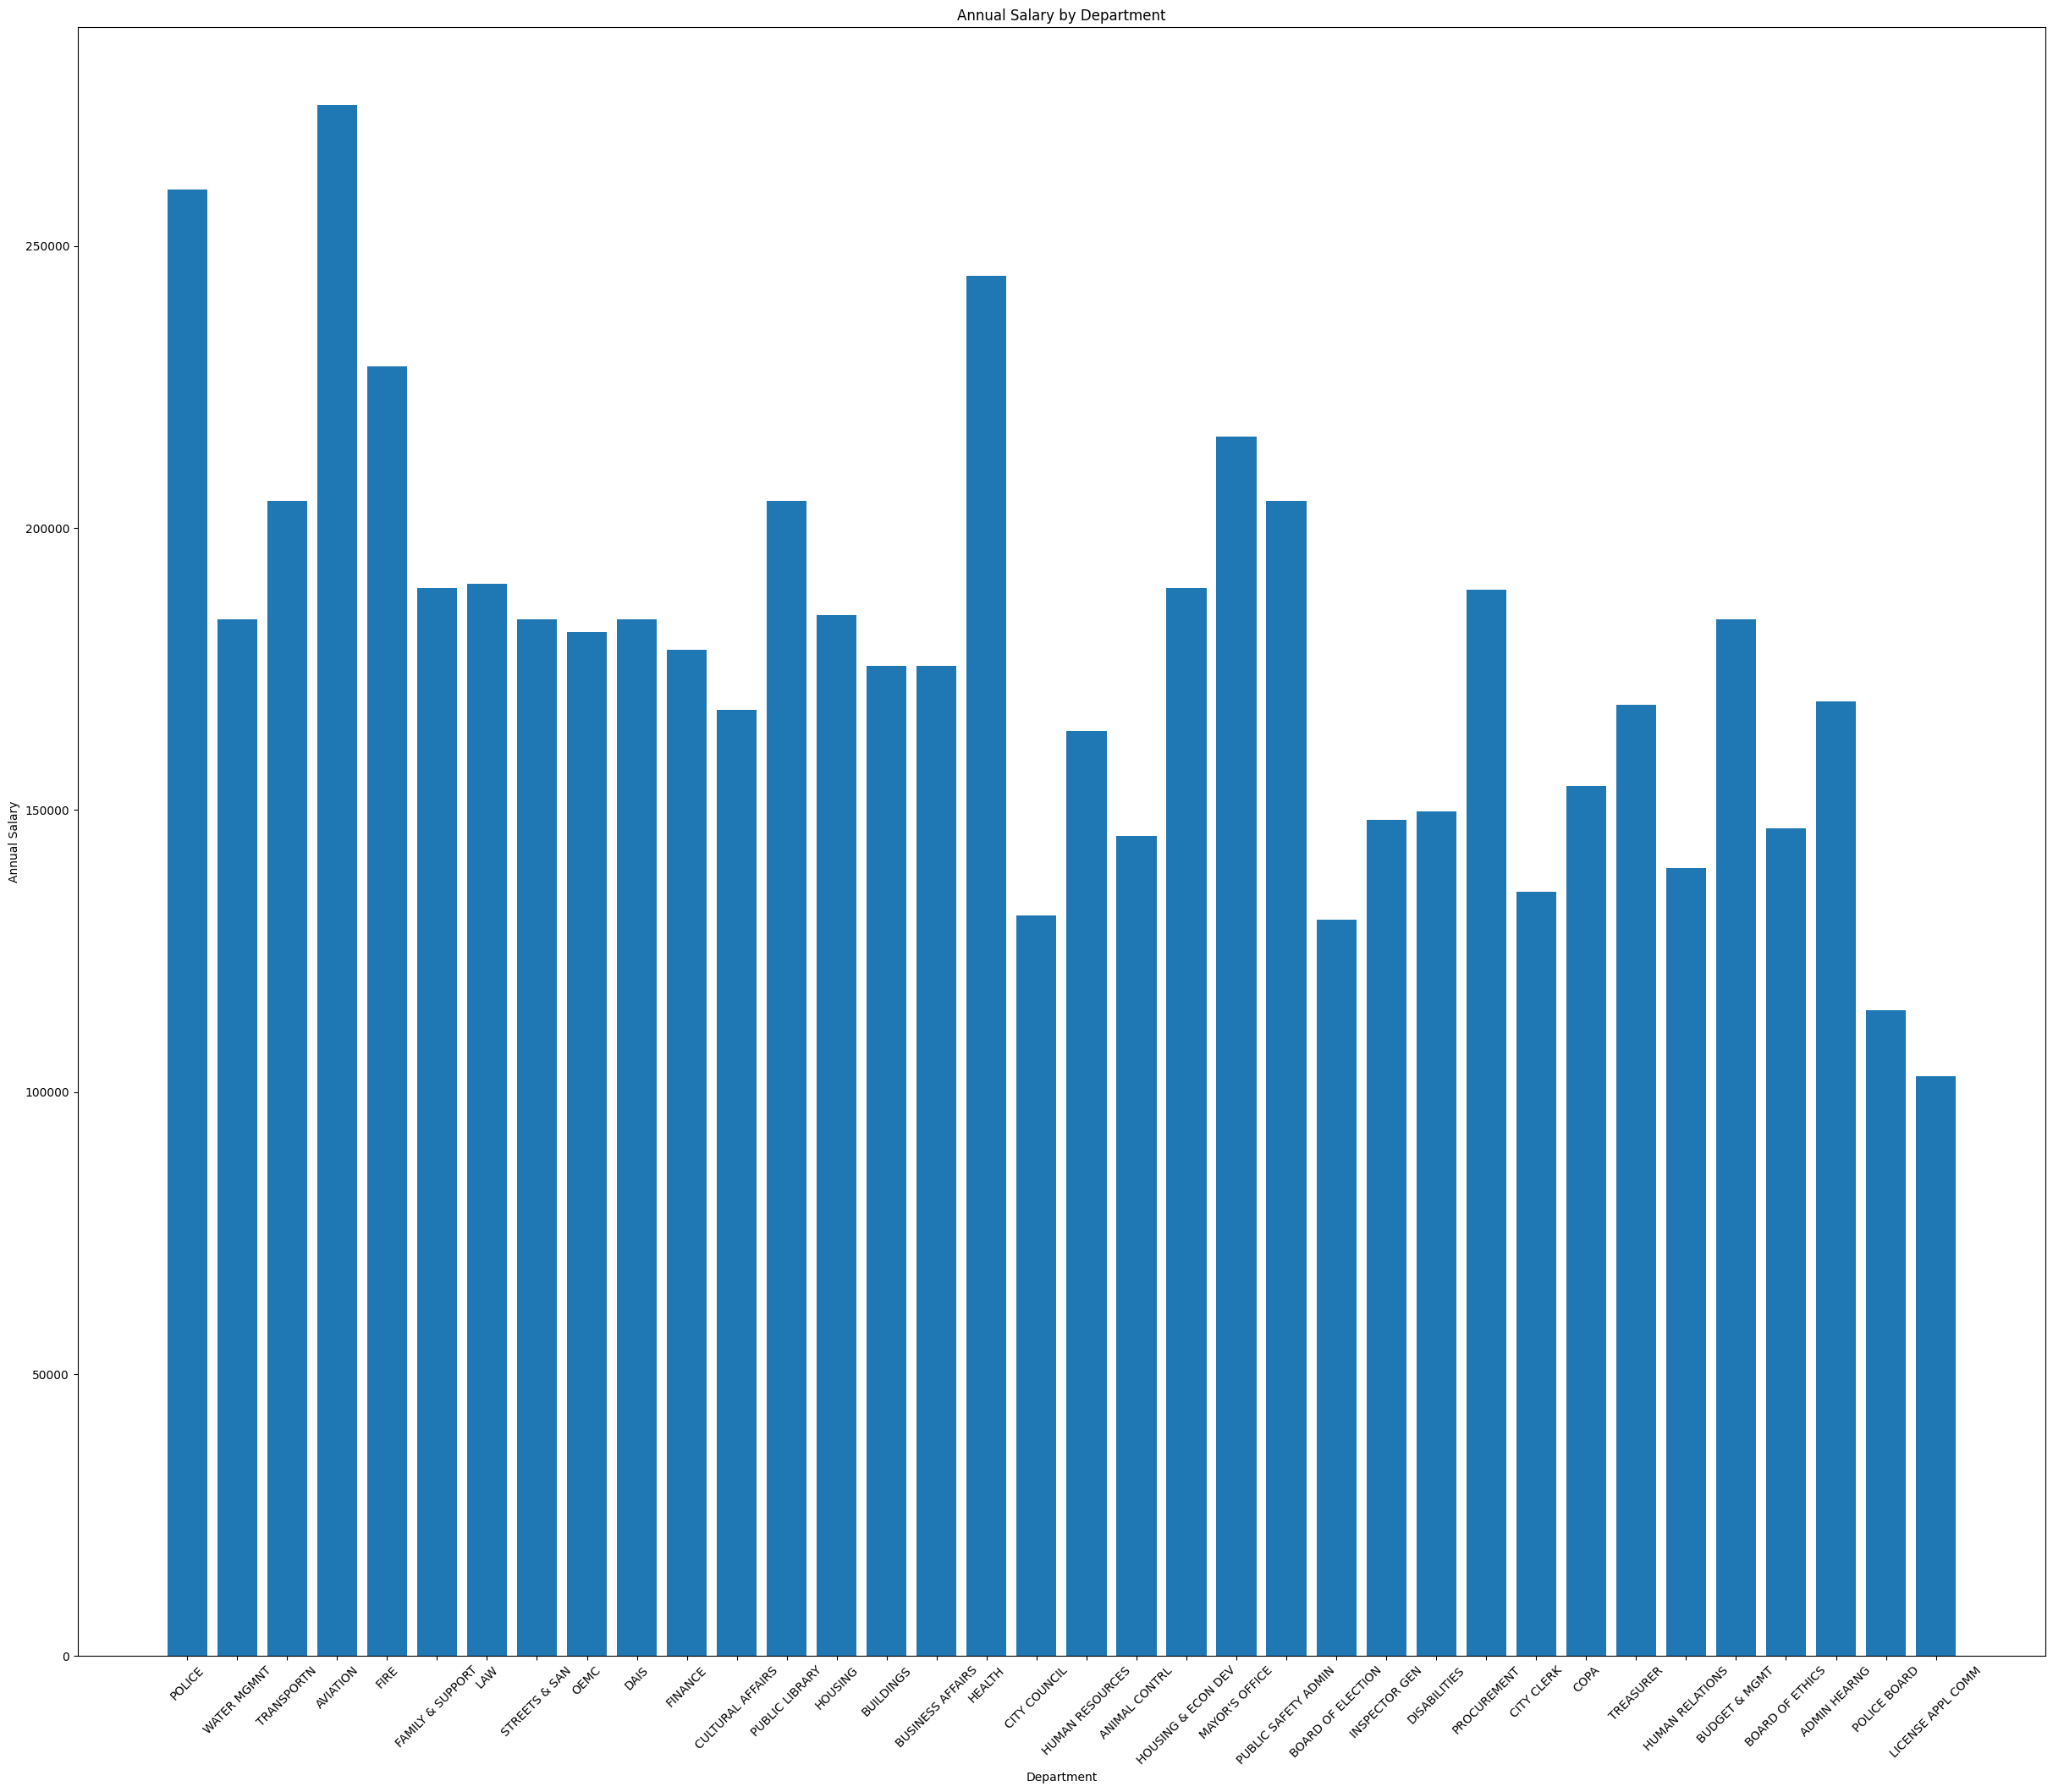

In [209]:
# Bar chart
plt.figure(figsize=(30, 25))
plt.bar(df['Department'], df['Annual Salary'])
plt.xlabel('Department')
plt.ylabel('Annual Salary')
plt.title('Annual Salary by Department')
plt.xticks(rotation=45)
plt.show()

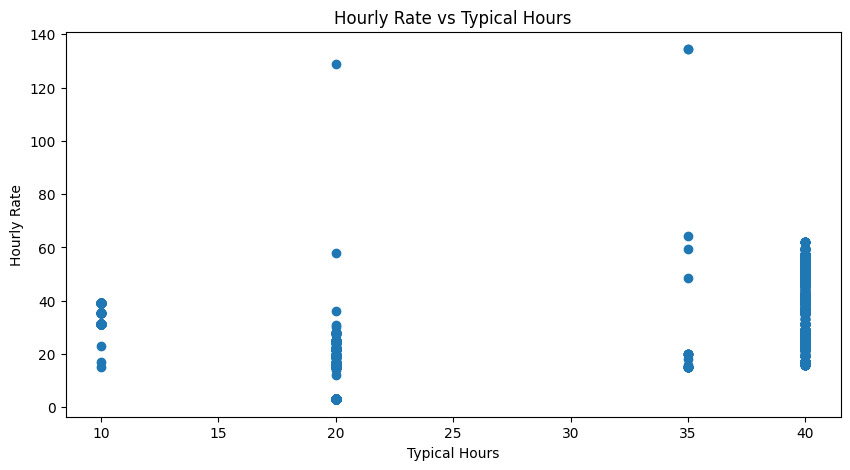

In [210]:
hourly_data = df[df['Salary or Hourly'] == 'Hourly']

# Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(hourly_data['Typical Hours'], hourly_data['Hourly Rate'])
plt.xlabel('Typical Hours')
plt.ylabel('Hourly Rate')
plt.title('Hourly Rate vs Typical Hours')
plt.show()

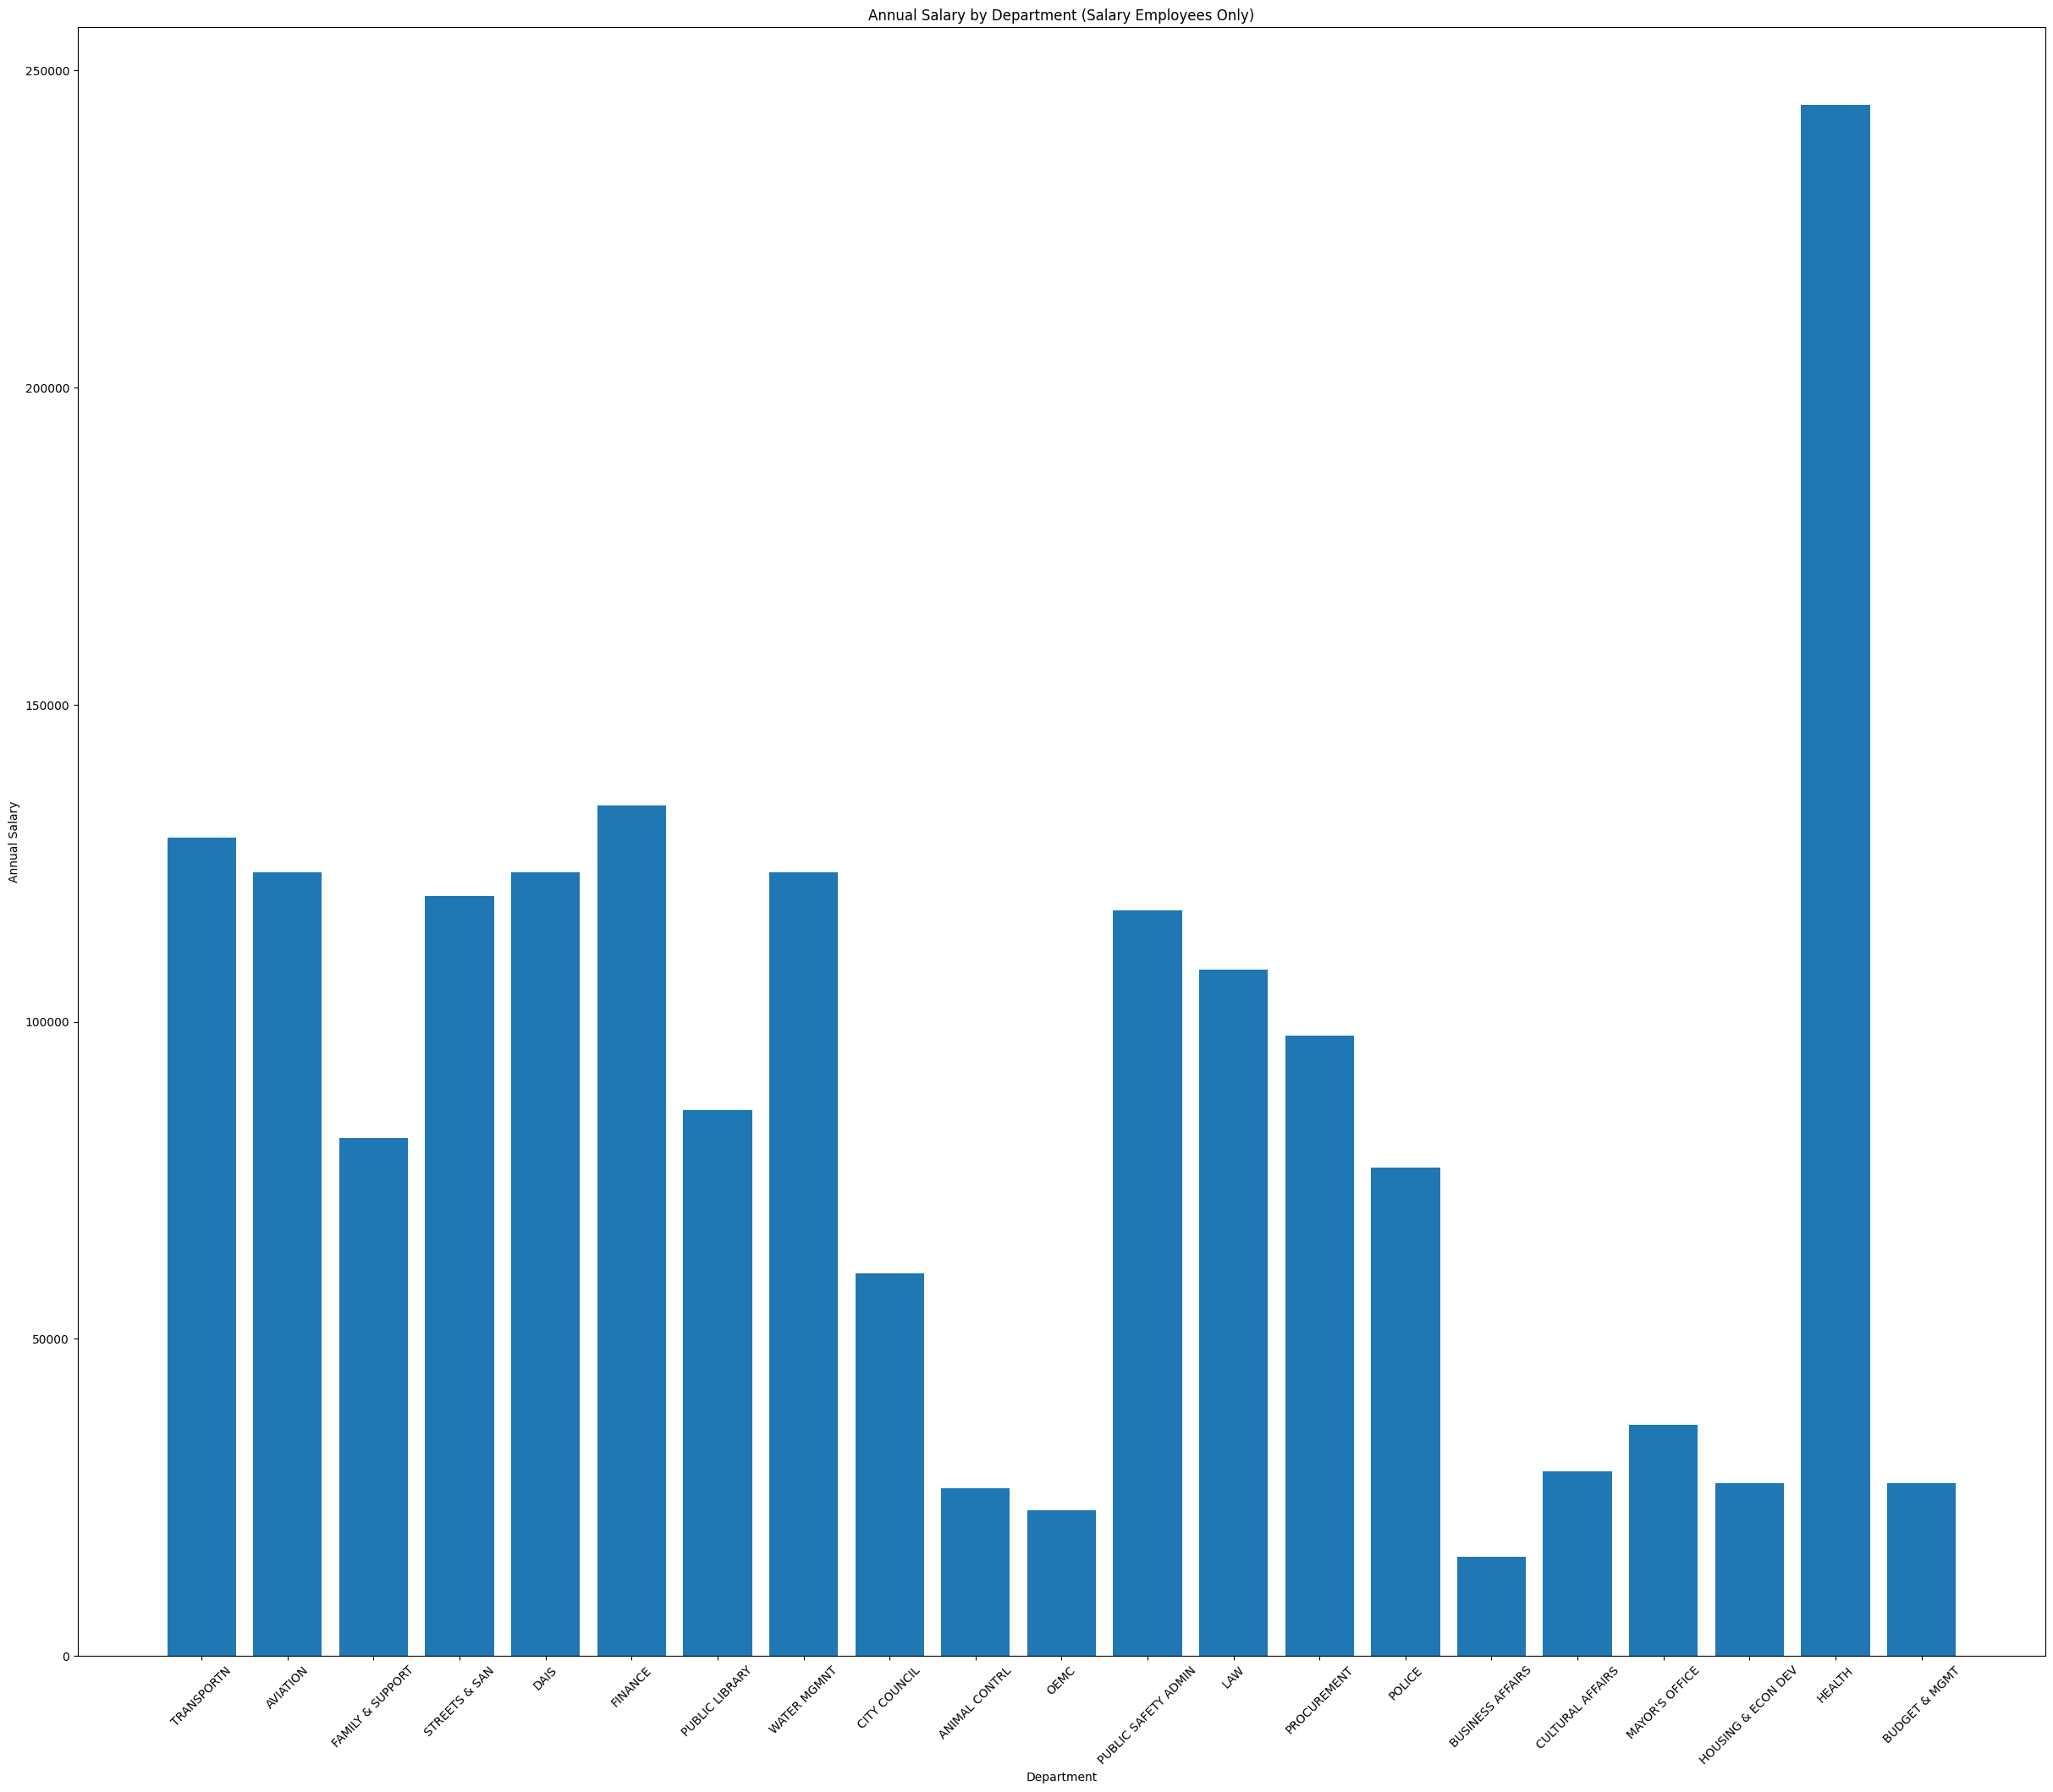

In [211]:
# Filter the data to only include rows with hourly rate data
hourly_data = df[df['Salary or Hourly'] == 'Hourly']

# Bar chart
plt.figure(figsize=(30, 25))
plt.bar(hourly_data['Department'], hourly_data['Annual Salary'])
plt.xlabel('Department')
plt.ylabel('Annual Salary')
plt.title('Annual Salary by Department (Salary Employees Only)')
plt.xticks(rotation=45)
plt.show()

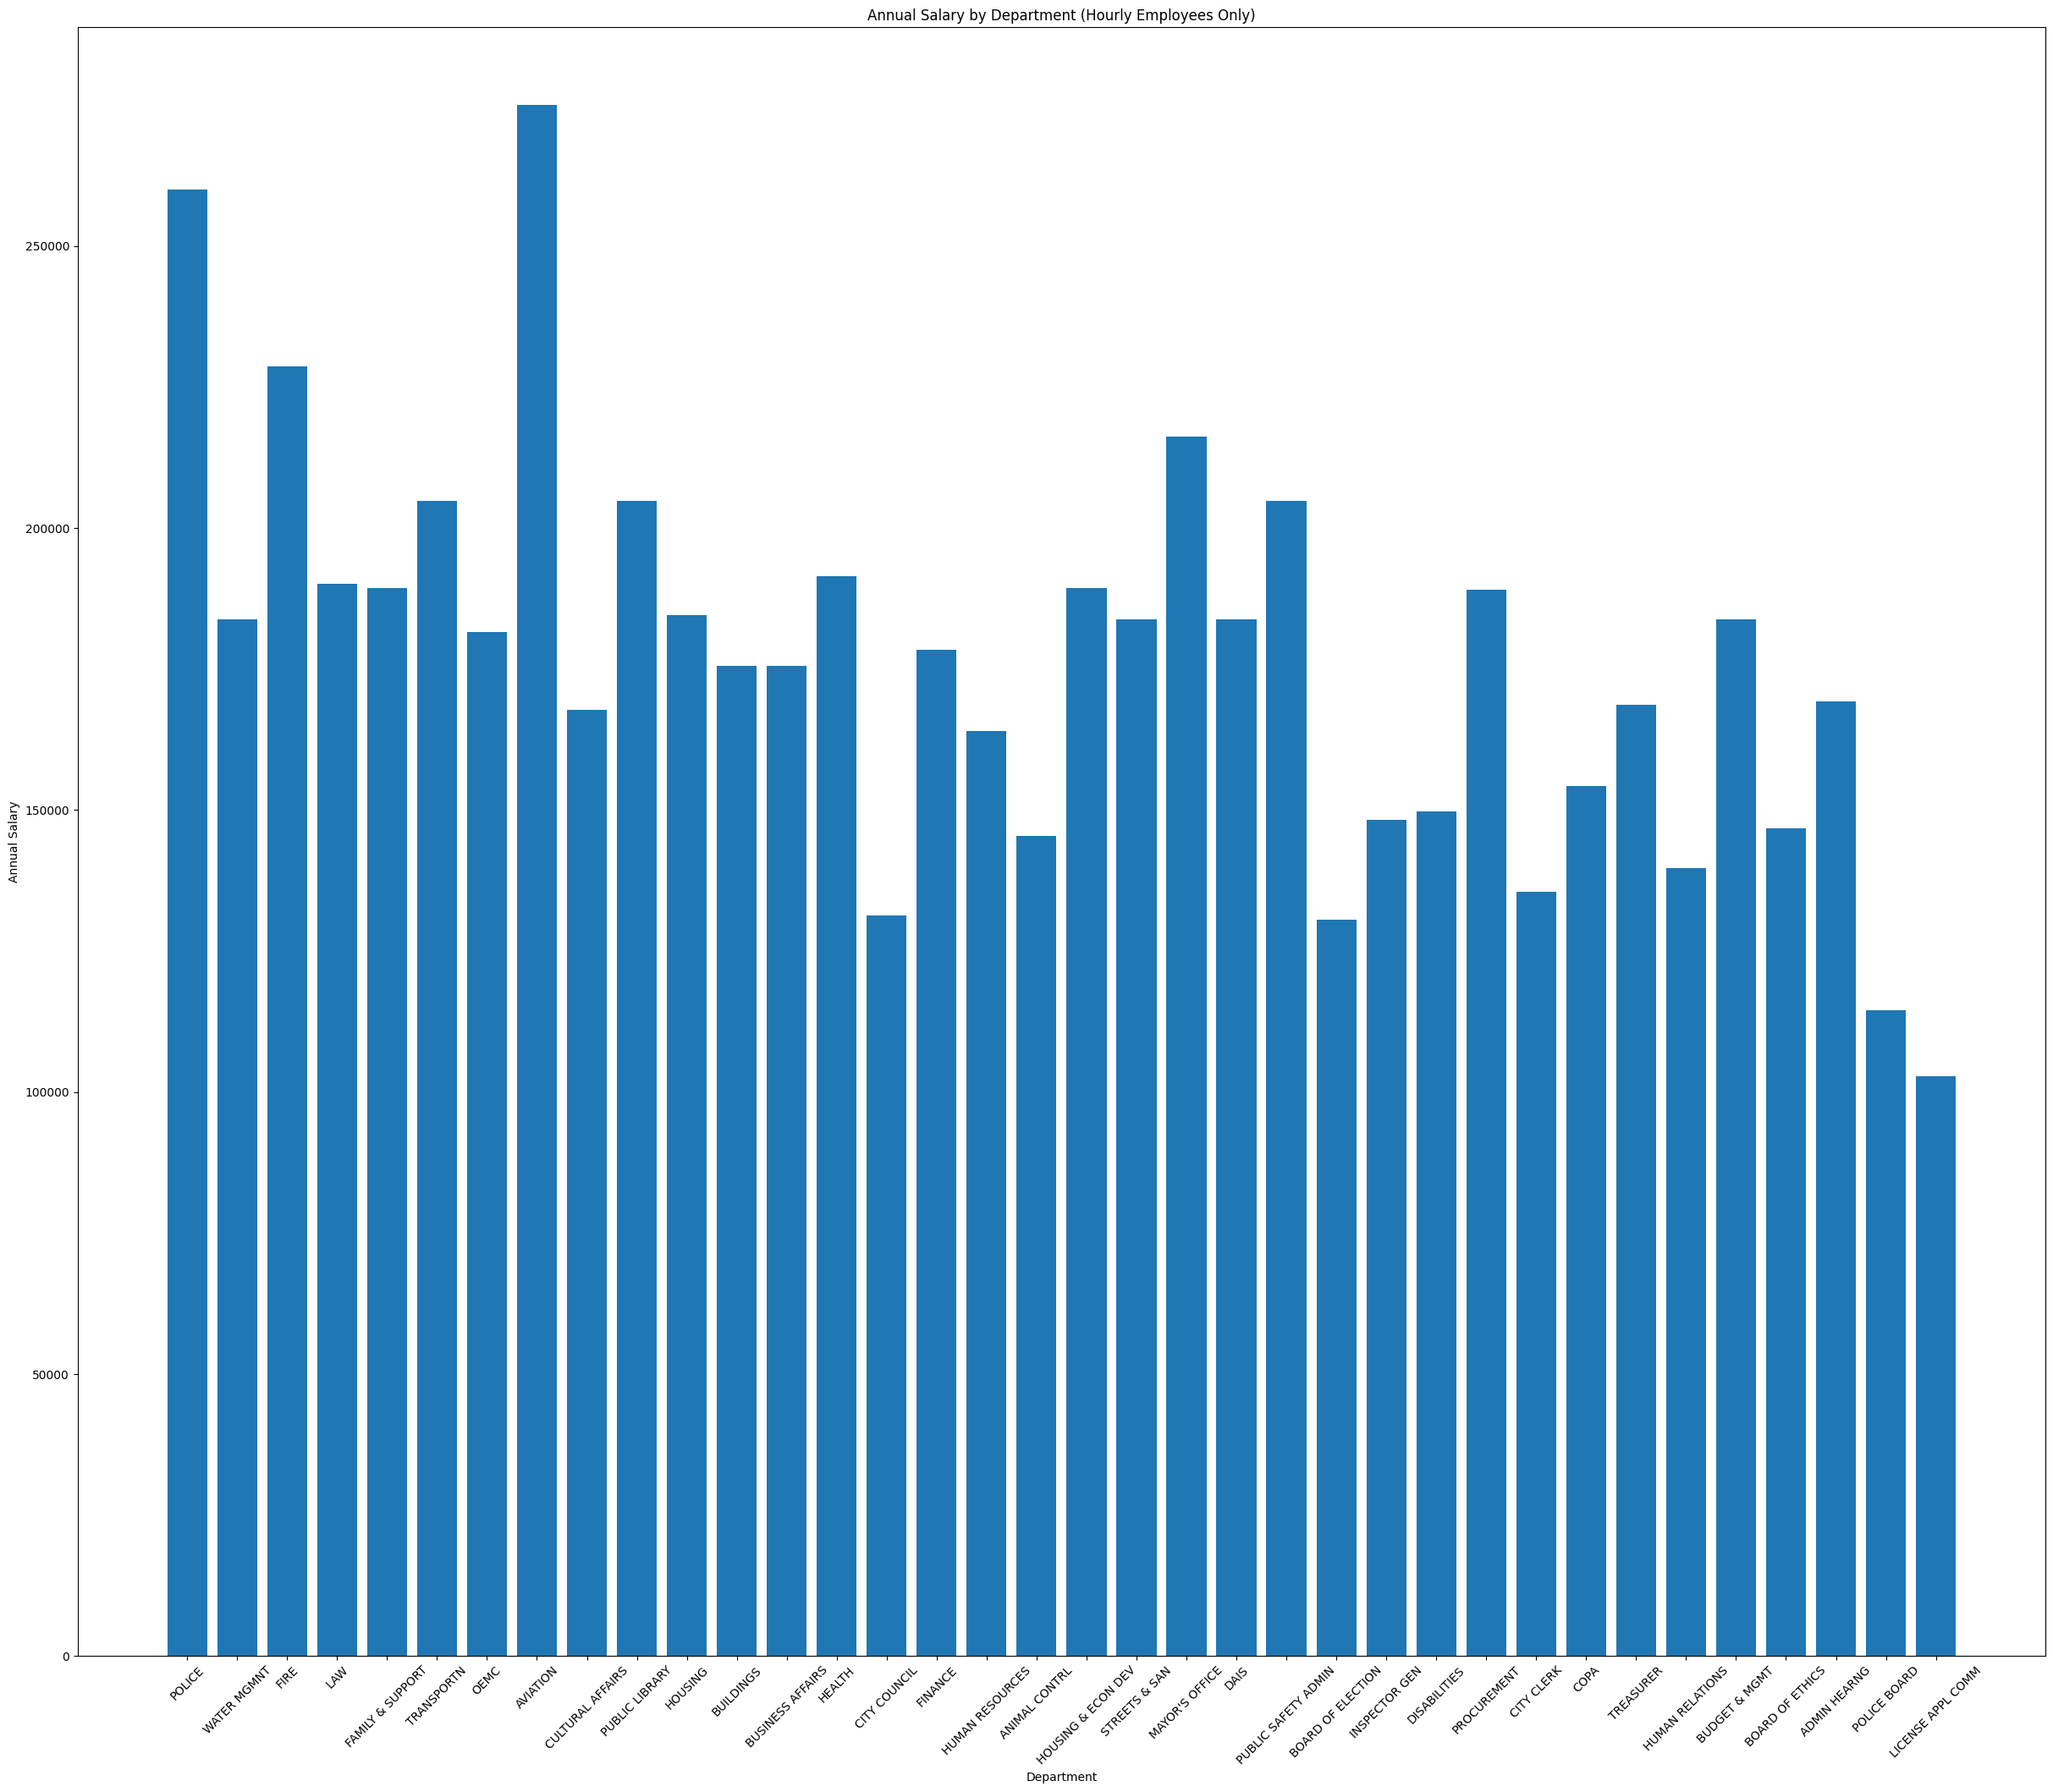

In [212]:
# Filter the data to only include rows with hourly rate data
hourly_data = df[df['Salary or Hourly'] == 'Salary']

# Bar chart
plt.figure(figsize=(30, 25))
plt.bar(hourly_data['Department'], hourly_data['Annual Salary'])
plt.xlabel('Department')
plt.ylabel('Annual Salary')
plt.title('Annual Salary by Department (Hourly Employees Only)')
plt.xticks(rotation=45)
plt.show()

In [213]:
#create model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31101 entries, 0 to 31100
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Titles        31101 non-null  object 
 1   Department        31101 non-null  object 
 2   Full_Part         31101 non-null  object 
 3   Salary or Hourly  31101 non-null  object 
 4   Typical Hours     31101 non-null  float64
 5   Annual Salary     31101 non-null  float64
 6   Hourly Rate       31101 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.7+ MB


In [214]:
x = df.drop(['Job Titles','Department','Full_Part','Salary or Hourly'], axis=1)
dms=pd.get_dummies(df[['Job Titles','Department','Full_Part','Salary or Hourly']])


In [215]:
dms

,Job Titles_A/SUPRV REDISTRICTING,Job Titles_ACCIDENT ADJUSTER,Job Titles_ACCOUNTANT,Job Titles_ACCOUNTANT I,Job Titles_ACCOUNTING TECHNICIAN,Job Titles_ADMIN ASST TO THE COMMISSIONERS,Job Titles_ADMINISTRATIVE ASST,Job Titles_ADMINISTRATIVE ASST - OFFICE ADMINISTRATOR,Job Titles_ADMINISTRATIVE ASST II,Job Titles_ADMINISTRATIVE ASST II - EXCLUDED,...,Department_PUBLIC LIBRARY,Department_PUBLIC SAFETY ADMIN,Department_STREETS & SAN,Department_TRANSPORTN,Department_TREASURER,Department_WATER MGMNT,Full_Part_F,Full_Part_P,Salary or Hourly_Hourly,Salary or Hourly_Salary
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31096,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
31097,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
31098,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
31099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [216]:
x

,Typical Hours,Annual Salary,Hourly Rate
0,0.0,122568.0,0.0
1,0.0,110796.0,0.0
2,0.0,122112.0,0.0
3,40.0,95472.0,45.9
4,0.0,86730.0,0.0
...,...,...,...
31096,0.0,90990.0,0.0
31097,0.0,95586.0,0.0
31098,0.0,102372.0,0.0
31099,0.0,109236.0,0.0


In [217]:
X=pd.concat([x,dms],axis=1)
Y=df["Annual Salary"]

In [218]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

In [219]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [223]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# Regresyon için metrikleri hesaplamak isterseniz
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2*100)


R-squared: 99.94086046650294


In [227]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(verbose=False).fit(X_train, y_train)
y_pred = cat.predict(X_test)

# Regresyon için metrikleri hesaplamak isterseniz
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


Mean Squared Error: 1619232.2637091775
R-squared: 0.9977413542621385


R-squared: 99.99908038621295


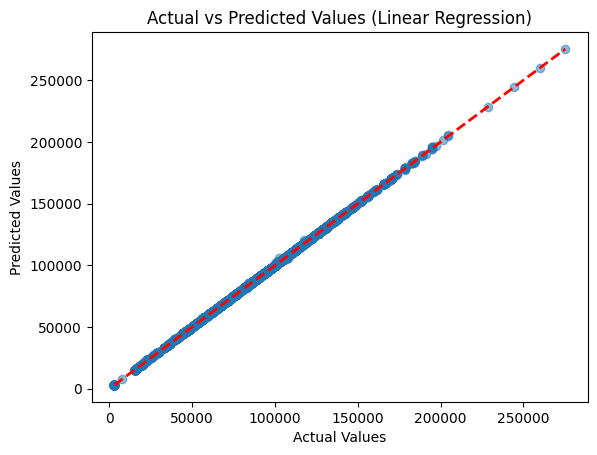

In [229]:
from sklearn.linear_model import LinearRegression

# Fit the linear regression model
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2*100)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")

# Plot the ideal line (45-degree line)
min_val = np.min([y_test.min(), y_pred.min()])
max_val = np.max([y_test.max(), y_pred.max()])
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.show()


In [232]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Regresyon için metrikleri hesaplamak isterseniz
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2*100)


R-squared: 99.91967235910136


R-squared: 99.91967235910136


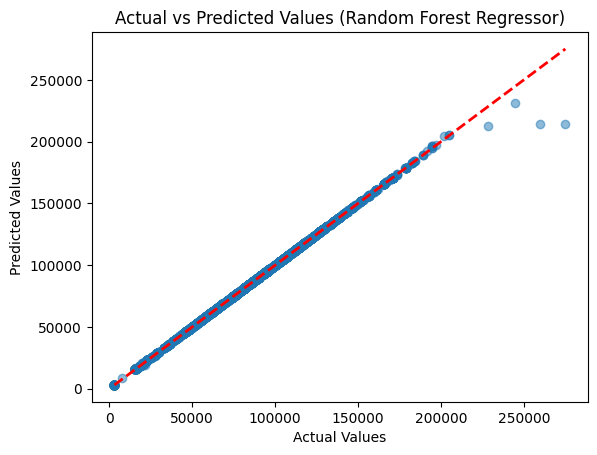

In [234]:

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2 * 100)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest Regressor)")

# Plot the ideal line (45-degree line)
min_val = np.min([y_test.min(), y_pred.min()])
max_val = np.max([y_test.max(), y_pred.max()])
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)

plt.show()


R-squared: 99.91967235910136


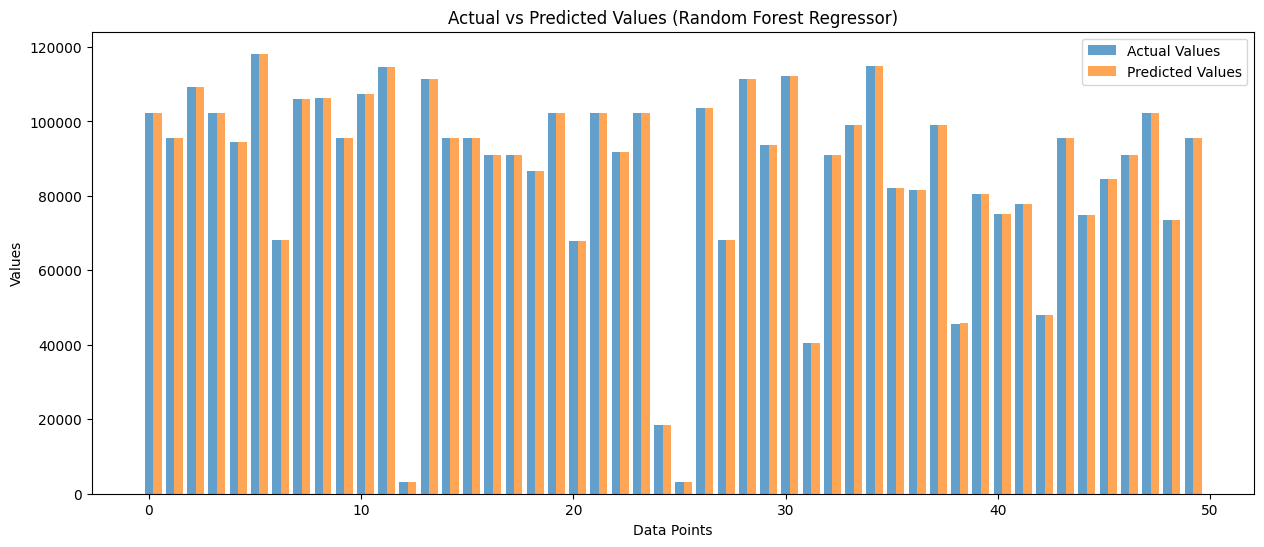

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2 * 100)

# Convert y_test and y_pred to NumPy arrays
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Select a limited number of data points (e.g., 50) to display in the bar plot
num_points = 50
indices = np.random.choice(range(len(y_test_array)), num_points, replace=False)

# Plot the actual vs predicted values
plt.figure(figsize=(15, 6))
plt.bar(np.arange(num_points), y_test_array[indices], width=0.4, alpha=0.7, label="Actual Values")
plt.bar(np.arange(num_points) + 0.4, y_pred_array[indices], width=0.4, alpha=0.7, label="Predicted Values")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values (Random Forest Regressor)")
plt.legend()

plt.show()
